In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [22]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### VISUALIZATIONS

MEDV - Median value of owner-occupied homes in $1000's

In [38]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

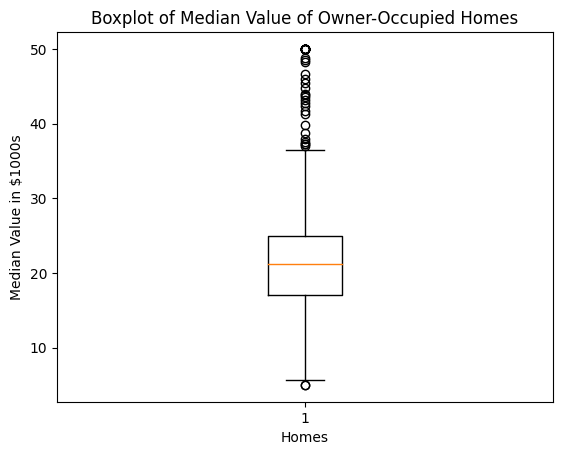

In [24]:
#Figure
fig, ax = plt.subplots()

#Boxplot
ax.boxplot(boston_df["MEDV"])

# Adding labels and title
ax.set_xlabel('Homes')
ax.set_ylabel('Median Value in $1000s')
ax.set_title('Boxplot of Median Value of Owner-Occupied Homes')

# Displaying the plot
plt.show()

The figure shows the following:
- Median Value of MEDV is around 20x1000s = $20000
- We will have to pay attention to outliers, especially in the upper range of values

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [43]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

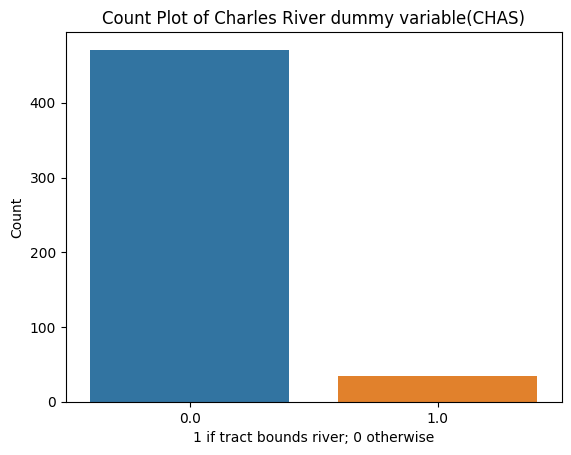

In [25]:
# Creating the count plot with seaborn
sns.countplot(x='CHAS', data=boston_df)

# Adding labels and title
plt.xlabel('1 if tract bounds river; 0 otherwise')
plt.ylabel('Count')
plt.title('Count Plot of Charles River dummy variable(CHAS)')

# Displaying the plot
plt.show()


Only 35 houses face tract river bounds

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [44]:
#First we discretize AGE and add a new column

boston_df['AGE_GROUPS'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])


In [28]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUPS
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


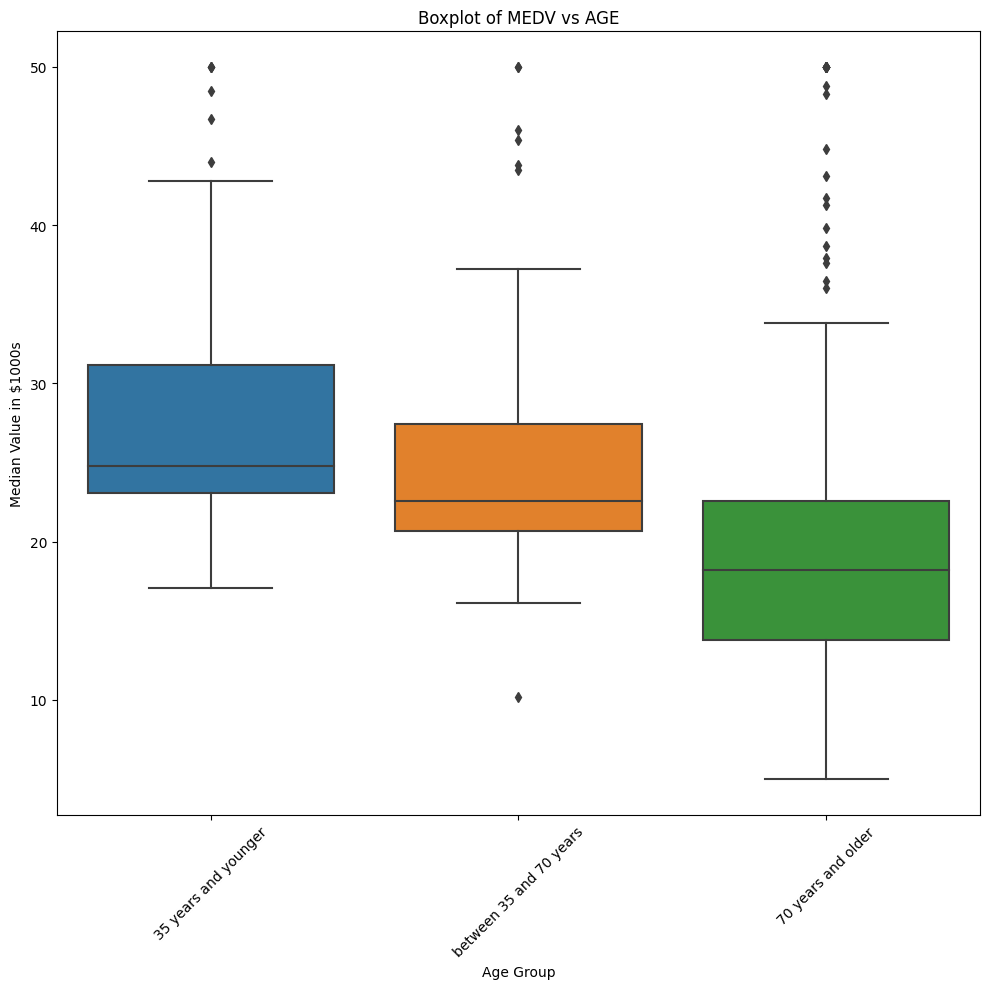

In [37]:
# Adjusting the figure size
plt.figure(figsize=(10, 10))

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Creating the boxplot
sns.boxplot(x='AGE_GROUPS', y='MEDV', data=boston_df)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Value in $1000s')
plt.title('Boxplot of MEDV vs AGE')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


Provide a scatter plot to show the relationship between Nitric oxide concentrations(NOX) and the proportion of non-retail business acres per town (INDUS). What can you say about the relationship?

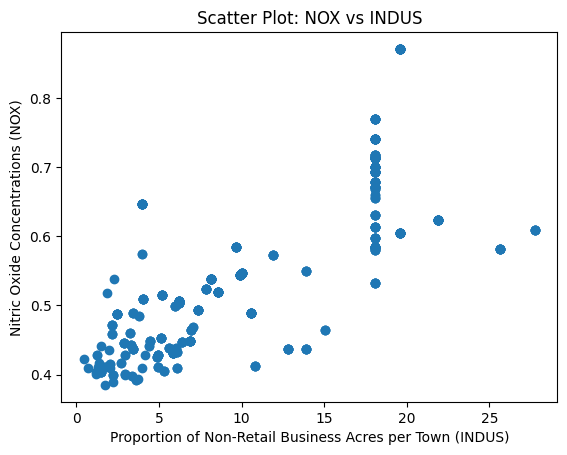

In [47]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'])

# Adding labels and title
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.title('Scatter Plot: NOX vs INDUS')

# Displaying the plot
plt.show()

This two variables seem to have a linear relation

Create a histogram for the pupil to teacher ratio variable (PTRATIO)

In [52]:
boston_df["PTRATIO"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [55]:
boston_df["PTRATIO"].value_counts()

PTRATIO
20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
18.4     16
16.6     16
21.2     15
15.2     13
13.0     12
17.9     11
20.9     11
18.7      9
19.6      8
19.7      8
17.6      7
16.4      6
16.9      5
16.0      5
20.1      5
18.0      5
16.1      5
19.0      4
18.3      4
16.8      4
18.2      4
14.9      4
18.5      4
17.0      4
18.9      3
12.6      3
14.8      3
15.3      3
15.9      2
15.6      2
18.8      2
22.0      2
13.6      1
15.1      1
17.3      1
21.1      1
14.4      1
15.5      1
Name: count, dtype: int64

In [54]:
boston_df["PTRATIO"].mode()

0    20.2
Name: PTRATIO, dtype: float64

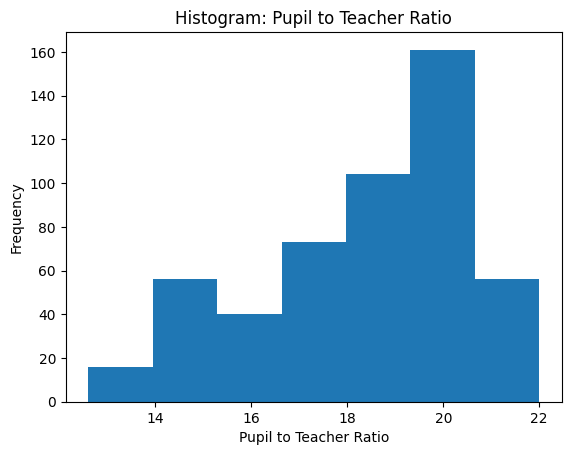

In [57]:
# Creating the histogram
plt.hist(boston_df['PTRATIO'], bins=7)

# Adding labels and title
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram: Pupil to Teacher Ratio')

# Displaying the plot
plt.show()

In [71]:
import scipy.stats as stats

#NULL HYPOTHESIS IS  "There is no difference between median values bounded or not bounded" 


# Extracting the median values for houses bounded and not bounded by the Charles river
median_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
median_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing the t-test for independent samples
t_statistic, p_value = stats.ttest_ind(median_bound, median_not_bound)

# Comparing the p-value with a significance level alpha=0.05
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis because there IS a significant difference in median values of houses bounded by the Charles river and those not bounded.")
else:
    print("There is NO significant difference in median values of houses bounded by the Charles river and those not bounded.")

Reject Null Hypothesis because there IS a significant difference in median values of houses bounded by the Charles river and those not bounded.


Since p_value obtained from the test is less than alpha we reject null hypothesis

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We want to determine if the three averages are statistically the same or are different

We will use AGE_GROUP

In [63]:
boston_df["AGE_GROUPS"].describe()

count                    506
unique                     3
top       70 years and older
freq                     287
Name: AGE_GROUPS, dtype: object

#NULL HYPOTHESIS IS  "The three age groups have the same mean value" 
#We fail to reject the null hypothesis if the p-value of the F-Test is higher than alfa (0.05)

In [65]:
age_categories = boston_df['AGE_GROUPS'].unique()

In [72]:
# Creating a list of median values for each category of 'AGE_GROUPS'
age_categories = boston_df['AGE_GROUPS'].unique()
median_values = [boston_df[boston_df['AGE_GROUPS'] == age]['MEDV'] for age in age_categories]

# Performing the ANOVA test
f_statistic, p_value = stats.f_oneway(*median_values)

# Comparing the p-value with a significance level 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis because there is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

Reject Null Hypothesis because there is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [70]:
p_value

1.7105011022702984e-15

This agrees withe the figure ploted at the exploration of the data 

## Can we conclude that there is no relationship between Nitric oxide concentrations(nox) and proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)

Null Hypothesis will be that NOX and INDUS have no correlation

In [75]:

# Calculating the Pearson correlation coefficient
correlation_coefficient = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

# Printing the correlation coefficient
print("Pearson correlation coefficient:", correlation_coefficient.round(2))

# Results
if correlation_coefficient > 0:
    print("Reject Null Hypothesis since there is a positive correlation between NOX and INDUS.")
elif correlation_coefficient < 0:
    print("Reject Null Hypothesis since there is a negative correlation between NOX and INDUS.")
else:
    print("We accept Null Hypothesis since there is no significant correlation between NOX and INDUS.")

Pearson correlation coefficient: 0.76
There is a positive correlation between NOX and INDUS.


Again agrees with the figure of the scatter plot between the two variables 

In [76]:
import scipy.stats as stats

stats.pearsonr( boston_df['NOX'], boston_df['INDUS'] )

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

With Pvalue less than 0.05 we reafirm that we can reject null hypothesis 

## What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes(MEDV)? (Regression analysis)

INCREASES ? OR DECREASES?

Null Hypothesis will be that there is no relationship between DIS and MEDV.

We will use as independante variable or target MEDV

In [79]:
import statsmodels.api as sm

X = boston_df["DIS"]

y = boston_df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        20:51:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-Value is less than 0.05, so there is a relationship between DIS and MEDV. We reject null hypothesis.

The coefficient for the DIS variable is 1.0916. 
It indicates that for every one unit increase in the weighted distance, the predicted median value of owner-occupied homes is expected to increase by 1.0916, assuming all other variables are held constant.

